# Exploring the Euro-US Dollar Exchange Rate Over The Years

## Introduction
> An exchange rate is the price of one currency in terms of another – in other words, the purchasing power of one currency against another. Under different circumstances, currencies can appreciate - the value of a currency increases, or depreciate - the value of a currency decreases. The Euro and the US Dollar have been some of the strongest currencies in the 21st century. Throughout this project, we will be analyzing the Euro-US Dollar exchange rates over different time periods. The aim of this project is to visualize the exchange rates over the different time periods and clearly show the fluctuations in the Euro-US Dollar exchange rates. The first part of this notebook will focus on preparing and cleaning the data, while in the second part we'll be building a function that generates graphs representing the Euro-US Dollar exchange rates at selected different time periods.

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import datetime as dt
from matplotlib.patches import Rectangle

In [2]:
# Loading in the data 
exchange_rates = pd.read_csv("/Users/omarstinner/Data Files/Python Projects/Files/Guided Project - Storytelling Data Visualization on Exchange Rates/euro.csv")

In [3]:
print(exchange_rates.info())
print(exchange_rates.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

> Before we clean and analyze the data, let us look at a brief summary of the dataset. The column names are in an unappealing format where we have the name of the currency enclosed in square brackets with unnecessary whitespaces. The majority of the columns are assigned the wrong data types. Some of the currency columns also contain a lot of null values.

## Cleaning The Data

In [4]:
# Cleaning the column names
columns = list(exchange_rates.columns)

columns2 = ['time', 'australian_dollar', 'bulgarian_lev', 'brazilian_real',
       'canadian_dollar', 'swiss_franc', 'chinese_yuan_renminbi',
       'cypriot_pound', 'czech_koruna', 'danish_krone', 'estonian_kroon',
       'uk_pound_sterling', 'greek_drachma', 'hong_kong_dollar',
       'croatian_kuna', 'hungarian_forint', 'indonesian_rupiah',
       'israeli_shekel', 'indian_rupee', 'iceland_krona', 'japanese_yen',
       'korean_won', 'lithuanian_litas', 'latvian_lats', 'maltese_lira',
       'mexican_peso', 'malaysian_ringgit', 'norwegian_krone',
       'new_zealand_dollar', 'philippine_peso', 'polish_zloty', 'romanian_leu',
       'russian_rouble', 'swedish_krona', 'singapore_dollar',
       'slovenian_tolar', 'slovak_koruna', 'thai_baht', 'turkish_lira',
       'us_dollar', 'south_african_rand']
    
exchange_rates.columns = columns2

> We are renaming the columns to a more suitable format, where we're getting rid of the square brackets and the unnecessary white spaces. We're also converting the column names to snake_case for better readability and accessibility. 

In [5]:
# Replacing "-" values withe null values
exchange_rates[exchange_rates == "-"] = np.nan

> We're replacing the "-" character with null values in the whole dataset so that we can perform computations on the columns/exchange rates.

In [6]:
# Converting the datatypes of the exchange rate columns to floats
for column in exchange_rates.columns[1:]:
    exchange_rates[column] = exchange_rates[column].astype("float64")

# Converting the "time" column to a datetime object
exchange_rates["time"] = pd.to_datetime(exchange_rates["time"])

> We are converting the data type of the exchange rate columns so that we can apply math functions to them. We are also converting the "time" column to a datetime object so that we can extract different time intervals from the date for specific period analysis.

## Analyzing The Data

In [7]:
# Calcualting the rolling means of the US dollar
exchange_rates["rolling_mean"] = exchange_rates["us_dollar"].rolling(30).mean()
exchange_rates.sort_values(["time"], ascending = True, inplace = True)

> Here, we are calculating the rolling average for the Euro-US Dollar exchange rate. A moving average helps smooth out the exchange rate over a specified period of time by creating a constantly updated average exchange rate. We selected a time period of 30 days and not less because exchange rates don't fluctuate much over the course of a couple of days or weeks. Setting the rolling time period to anything less would lessen the smoothness of our analysis on exchange rates further into the past.

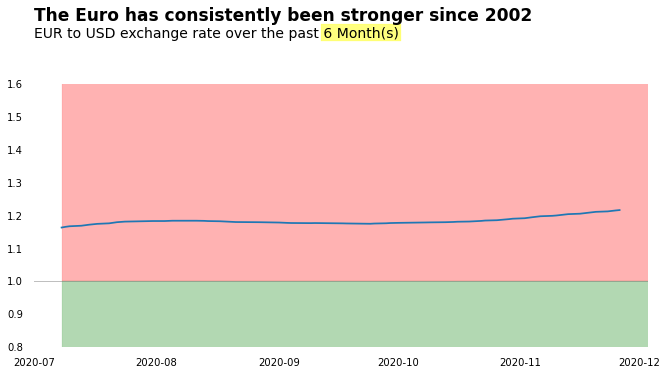

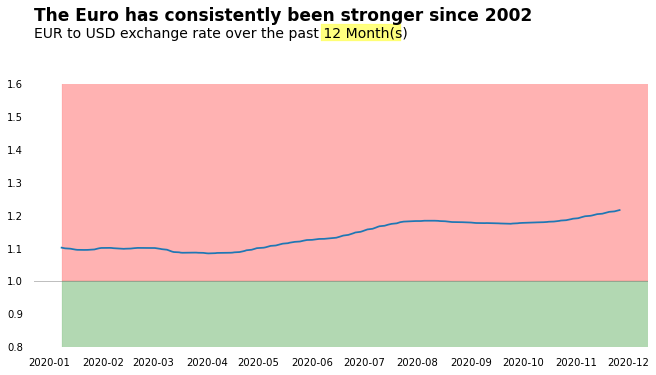

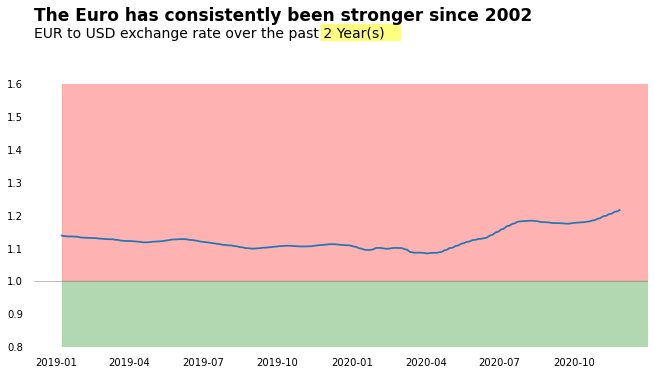

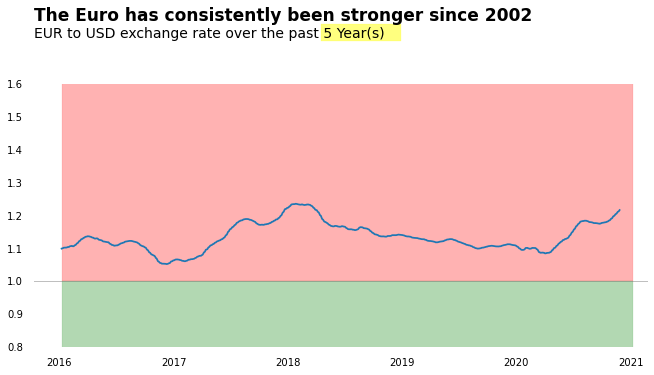

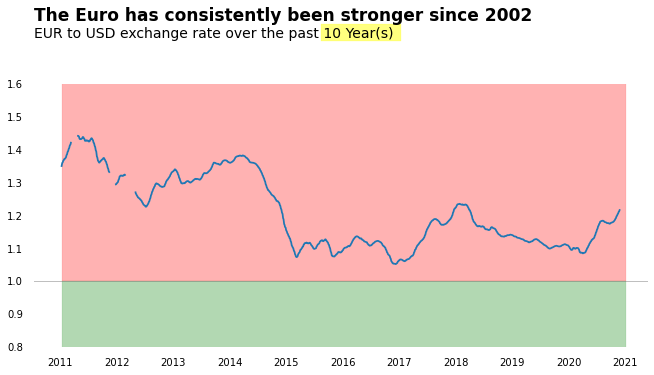

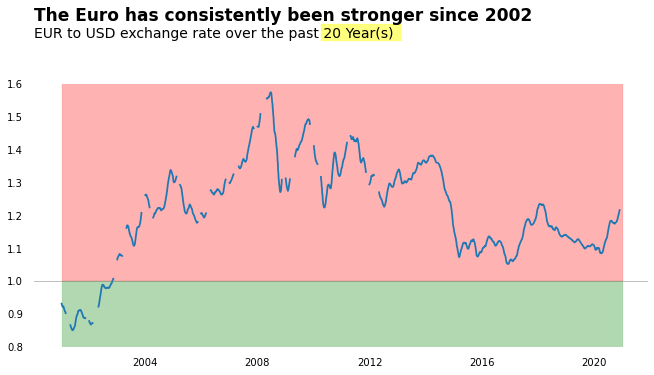

In [8]:
# Function to calculate the exchange rates from the Euro to US dollar over different time intervals
def period_selector(input_period):
    period = exchange_rates[exchange_rates["time"] >= input_period]
    number = None
    time_frame = None
    time_period = ((period["time"].iloc[-1]) - (period["time"].iloc[0])).days - 1


    if time_period <= 7:
        number = round((((period["time"].iloc[-1]) - (period["time"].iloc[0]))/np.timedelta64(1, "W")))
        time_frame = "Week"
    if time_period > 7 and time_period <= 365:
        number = round(((period["time"].iloc[-1]) - (period["time"].iloc[0]))/np.timedelta64(1, "M"))
        time_frame = "Month(s)"
    if time_period > 365:
        number = round(((period["time"].iloc[-1]) - (period["time"].iloc[0]))/np.timedelta64(1, "Y"))
        time_frame = "Year(s)"
    
    combo = str(number) + " " + str(time_frame)


    
    # Plotting the graph
    style.use('seaborn-notebook')
    fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios': [1, 8]}, figsize=(11,6)) #we cant add the itle to do the main plot, beacue there i sno pattern that the x and y corindates willl follows, they are all dufferent and custom, so Im going to have to add a subplot justf ro the title 
    
    
    # Main plot
    ax2.plot(period["time"], period["rolling_mean"])
    for location in ["left", "right", "top", "bottom"]:
        ax2.spines[location].set_visible(False)
    ax2.tick_params(bottom = False, left = False)
    ax2.set_ylim([0.8, 1.6])
    ax2.axhline(1, color='grey', linewidth=1, alpha=0.5)
    ax2.grid(False)
    rect1 = Rectangle((period["time"].iloc[0],1), (period["time"].iloc[-1] - period["time"].iloc[0]),1.6, alpha = 0.3, color = "red")
    rect2 = Rectangle((period["time"].iloc[0],0), (period["time"].iloc[-1] - period["time"].iloc[0]),1, alpha = 0.3, color = "green")
    ax2.add_patch(rect1)
    ax2.add_patch(rect2)



    
    #text plot
    for location in ["left", "right", "top", "bottom"]:
        ax1.spines[location].set_visible(False)
    ax1.tick_params(bottom = False, left = False)
    ax1.text(0,1, "The Euro has consistently been stronger since 2002", size = 17, weight = "bold")
    ax1.text(0,0.5, "EUR to USD exchange rate over the past {}".format(combo), size = 14)
    ax1.set_xticklabels([]) #remember that we want to keep tha ctual values there so that we can use the x and y coordinates to place the text, sow just set them blak instead of actaully removing them
    ax1.set_yticklabels([])
    rect3 = Rectangle((0.468, 0.4), 0.13, 0.5, alpha = 0.5, color = "yellow")
    ax1.add_patch(rect3)


    plt.show()

# Showing the Euro to US dollar exchange rates over the past  6 months, 1 year, 2 years, 5 years, 10 years, and 20 years
period_selector("2020-07-08")
period_selector("2020-01-08")
period_selector("2019-01-08")
period_selector("2016-01-08")
period_selector("2011-01-08")
period_selector("2001-01-08")

> The above function outputs a graph showing the Euro to US-Dollar exchange over a selected period of time. The purpose of the function is to simulate an exchange rate chart you would find on xe.com. When a portion of the line graph is in the red area it shows the US-Dollar's weaker value to Euro. When a portion of the line graph is in the green area it shows the US-Dollar's stronger value to Euro. We see that for much of the 21st century, the US-Dollar has always been weaker than the Euro and was only stronger before the year 2002. From the data we have, we see that the US-Dollar was only slightly stronger than the Euro pre-2002 and was never really as dominant as the Euro (shown by the line's closeness to zero line). As expected, during the 2008 financial crisis, we saw the US-Dollar have a spike in its devaluation. 2016 and 2017 were good economic periods for the United States as we can see the US-Dollar come closer to zero and almost match the value of the Euro.

## Conclusion
> We can conclude that the Euro has been the dominant currency of the two (Euro and US-Dollar) during the 21st century. More recently, the US-Dollar has been appreciating and was close to the Euro during 2016, 2017, and 2020. From 2008 to 2012 the US-Dollar was not performing relatively well due to the effects of the 2008 financial crisis. The US-Dollar had its moment of glory before 2002, probably due to the growth rate of money in the EU, which caused the Euro to depreciate. However, starting in 2003, the US-Dollar saw steady devaluation until around 2006.

In [9]:
%%html
<style>
.nbviewer div.output_area {
  overflow-y: auto;
  max-height: 400px;
}
</style>